In [38]:
import pandas as pd
df = pd.read_excel('/Users/neil/Documents/code/Research-Project/data/stock_data/S&P500_data.xlsx')
df.head(10)

,Date,Open,High,Low,Close*,Avg. Sentiment Score,Tragectory
0,2023-06-29,4374.94,4398.39,4371.97,4396.44,0.5940,1
1,2023-06-30,4422.44,4458.48,4422.44,4450.38,0.6130,1
2,2023-07-03,4450.48,4456.46,4442.29,4455.59,0.5100,1
3,2023-07-05,4442.04,4454.06,4436.61,4446.82,0.6980,0
4,2023-07-06,4422.62,4422.62,4385.05,4411.59,0.4816,0
5,2023-07-07,4404.54,4440.39,4397.40,4398.95,0.4500,0
6,2023-07-10,4394.23,4412.60,4389.92,4409.53,0.5300,1
7,2023-07-11,4415.55,4443.64,4408.46,4439.26,0.4800,1
8,2023-07-12,4467.69,4488.34,4463.23,4472.16,0.5220,1
9,2023-07-13,4491.50,4517.38,4489.36,4510.04,0.7100,1


In [39]:
x = df.iloc[:,[1,2,3,5]].values 
x

array([[4.37494e+03, 4.39839e+03, 4.37197e+03, 5.94000e-01],
       [4.42244e+03, 4.45848e+03, 4.42244e+03, 6.13000e-01],
       [4.45048e+03, 4.45646e+03, 4.44229e+03, 5.10000e-01],
       [4.44204e+03, 4.45406e+03, 4.43661e+03, 6.98000e-01],
       [4.42262e+03, 4.42262e+03, 4.38505e+03, 4.81600e-01],
       [4.40454e+03, 4.44039e+03, 4.39740e+03, 4.50000e-01],
       [4.39423e+03, 4.41260e+03, 4.38992e+03, 5.30000e-01],
       [4.41555e+03, 4.44364e+03, 4.40846e+03, 4.80000e-01],
       [4.46769e+03, 4.48834e+03, 4.46323e+03, 5.22000e-01],
       [4.49150e+03, 4.51738e+03, 4.48936e+03, 7.10000e-01],
       [4.51461e+03, 4.52776e+03, 4.49956e+03, 6.58000e-01],
       [4.50886e+03, 4.53285e+03, 4.50490e+03, 4.40000e-01],
       [4.52178e+03, 4.56230e+03, 4.51459e+03, 5.68000e-01],
       [4.56387e+03, 4.57843e+03, 4.55748e+03, 5.91000e-01],
       [4.55438e+03, 4.56474e+03, 4.52756e+03, 5.00000e-01],
       [4.55016e+03, 4.55500e+03, 4.53579e+03, 5.53000e-01],
       [4.54339e+03, 4.5

In [40]:
y = df.iloc[:,4].values
y

array([4396.44, 4450.38, 4455.59, 4446.82, 4411.59, 4398.95, 4409.53,
       4439.26, 4472.16, 4510.04, 4505.42, 4522.79, 4554.98, 4565.72,
       4534.87, 4536.34, 4554.64, 4567.46, 4566.75, 4537.41, 4582.23,
       4537.41])

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
y_test

array([4582.23, 4505.42, 4534.87, 4565.72, 4450.38])

In [45]:
y_pred = model.predict(x_test)

In [46]:
y_pred

array([4578.99249558, 4513.0785242 , 4538.74769444, 4568.91556743,
       4447.36538627])

In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9905465205550432

In [48]:
import matplotlib.pyplot as plt



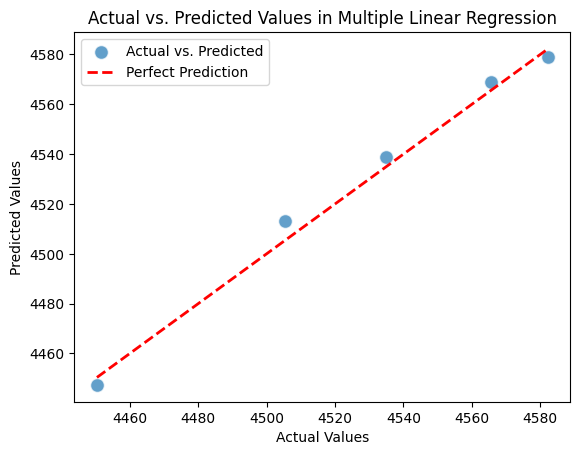

In [49]:
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', s=100, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values in Multiple Linear Regression")
plt.legend()
plt.show()

In [51]:
X_columns = ['Open','High','Low', 'Avg. Sentiment Score']  # Replace with your column names
Y_column = 'Close*'  # Replace with your column name

# Create a new DataFrame with only the selected columns
selected_columns = X_columns + [Y_column]
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Print or display the correlation matrix
correlation_matrix

,Open,High,Low,Avg. Sentiment Score,Close*
Open,1.000000,0.988389,0.959991,-0.064459,0.939840
High,0.988389,1.000000,0.970275,-0.063023,0.961548
Low,0.959991,0.970275,1.000000,-0.005104,0.988176
Avg. Sentiment Score,-0.064459,-0.063023,-0.005104,1.000000,-0.003754
Close*,0.939840,0.961548,0.988176,-0.003754,1.000000
